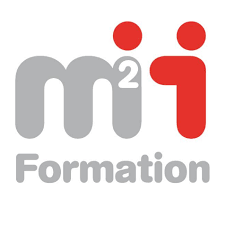

# Introduction

La production des visualisations "plots" est l'une des tâches les plus importantes en analyse de données. Elle peut faire partie de l'étape exploratoire, par exemple, pour aider à identifier les valeurs extrêmes "outliers", les transformations de données ou la génération d'idées pour les modèles. Pour d'autres, la production d'une visualisation interactive pour le web peut être l'objectif. 

Python possède plusieurs bibliothèques pour la production des visualisations statiques ou dynamiques, la plus utilisée est **matplotlib**.

La bibliothèque **matplotlib** a été conçue pour la création des graphiques(généralement 2D). Le projet a été démarré par John Hunter en 2002 afin de mettre en place une bibliothèque de graphiques semblable à celle de MATLAB. Les communautés IPython et matplotlib ont collaboré afin de simplifier la production des graphique depuis le shell IPython. matplotlib supporte plusieurs IHM sur tous les systèmes d'exploitation et peut exporter les graphiques vectoriels et raster (PDF, SVG, JPG, PNG, BMP, GIF, ...).

Plusieurs bibliothèques se basent sur matplotlib telles que seaborn. 

# API

Avec matplotlib, en utilise les conventions d'importation suivantes:

In [ ]:
pip install matplotlib  # Installation du package matplotlib

In [ ]:
import matplotlib.pyplot as plt # La classe pyplot est la classe la plus utilisée du package

In [ ]:
import numpy as np  # numpy ou Numerical Python est un package qui contient des fonctions mathématiques

In [ ]:
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

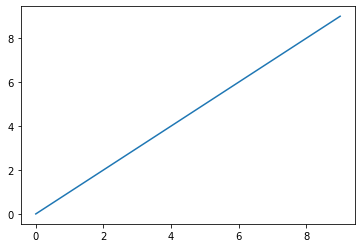

In [ ]:
plt.plot(data)

In [ ]:
plt.plot?

**Figures et Subplots**

Les tracés "plots" en matplotlib résident dans un objet Figure.
On peut créer une nouvelle figure avec plt.figure:

In [ ]:
fig = plt.figure(figsize=(500, 500))

Sur IPython, un tracé vide est affiché, alors que sur Jupyter, rien ne sera affiché jusqu'à l'utilisation d'autres commandes.

**plt.figure** a un certain nombre d'options, notamment, **figsize** qui garantie que la figure a une certaine taille lors de la sauvegarde sur le disque.

On ne peut pas créer un tracé avec une figure vide, on doit créer un ou plusieurs sous-tracés "subplots" en utilisant la fonction **add_subplot**:

In [ ]:
ax1 = fig.add_subplot(2, 2, 1)

Ceci signifie que la figure se composer de 2 x 2 tracés et on a séléctionné le premier des 4 subplots.

In [ ]:
ax2 = fig.add_subplot(2, 2, 2)

In [ ]:
ax3 = fig.add_subplot(2, 2, 3)

Pour Jupyter, il faut mettre l'ensemble des commandes dans la même cellule.

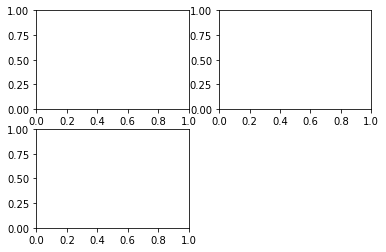

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Une fois une commande telle que plt.plot([1.5, 3.5, -2, 1.6]) est exécutée, matplot dessine sur la dernière figure.

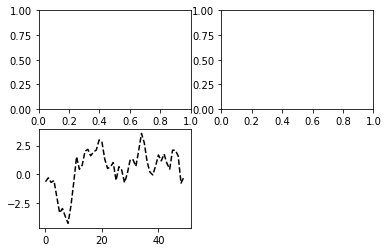

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

L'option 'k--' est une option de style qui permet de traçer une ligne noire discontinue. 

Les objets retournés par fig.add_subplot sont de type AxeSubplot, sur lesquels on peut directement traçer.

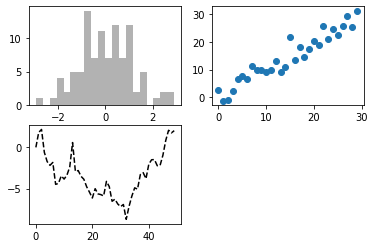

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


La création d'une figure avec une grille de traçés est une tâche commune que matplot a crée une méthode plt.subplots qui crée la nouvelle figure et retourne un tableau NumPy contenant les sous-tracés crées.

In [ ]:
fig.add_subplot

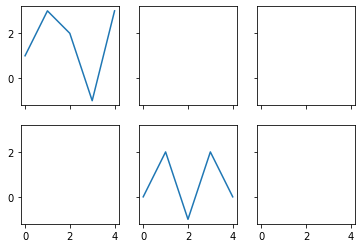

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)

axes[0,0].plot([1, 3, 2, -1, 3])
axes[1,1].plot([0, 2, -1, 2, 0])

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63f0c2af60>,
      dtype=object)

Cette méthode est très utile comme on peut indexer le tableau comme un tableau à deux dimensions. Par exemple, axes[0, 1]. On peut aussi indiquer si les sous-tracés doivent avoir les mêmes axes x ou y en utilisant sharex et sharey respectivement. C'est particulièrement utilise quand on compare les données en utilisant la même échelle.

> Argument | Description
> -- | --
> nrows | Nombre de lignes des sous-tracés
> ncols | Nombre de colonnes des sous-tracés
> sharex | Tous les sous-tracés utilisent la même échelle de l'axe x
> sharey |  Tous les sous-tracés utilisent la même échelle de l'axe y
> subplot_kw | Dictionnaire des mots clés passés à add_subplot
> **fig_kw | Mots clés additionnels utilisés lors de la création de la figure.

**Ajuster les espacements**

Par défaut, matplotlib laisse un certain remourrage "padding" aux alentours des sous-tracés et des espacements entre eux. Ces espacements sont relatifs à la largeur et à la longeur du tracé, si la fenêtre du tracé est redimensionnée manuellement ou automatiquement, le tracé s'ajuste dynamiquement. On peut changer l'espacement en utilisant la méthode subplots_adjust de l'objet Figure:



```
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```



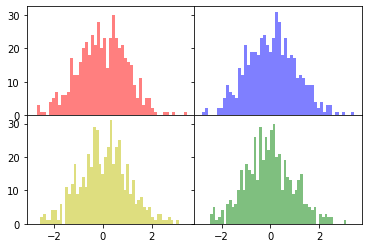

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

colors = ['r', 'b', 'y', 'g']

for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.randn(500), bins=50, color=colors[2*i+j], alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

**Couleurs, Marquers et Styles de lignes**

La fonction principale de matplotlib "plot" accepte des tableaux de coordonnés x et de y et optionnellement une abreviation sous forme de chaîne de caractères indiquant la couleur et le style de la ligne. Par exemple, pour tracer $y = \mathcal{f(x)}$ avec une ligne discontinue en vert, on peut exécuter:

```
ax.plot(x, y, 'g--')
```

La syntaxe équivalente est:

```
ax.plot(x, y, linestyle='--', color='g')
```

Un nombre d'abréviations de couleurs sont fournies pour les couleurs communes, mais on peut utiliser n'importe quelle couleur du spectrum en utilisant le code hexadécimal ('#CECECE'), on peut afficher la liste complète des styles de lignes en utilsant plot?.


In [ ]:
from matplotlib.pyplot import plot

In [ ]:
plot?

Les lignes peuvent avoir des marqueurs pour surligner les points de données. Quand la ligne tracée est continue suite à l'interpolation, les points ne peuvent pas être distingués. Le marqueur peut être précisé dans la chaîne de style où la couleur doit être suivie du type de marqueur et du style de la ligne.

In [ ]:
from numpy.random import randn

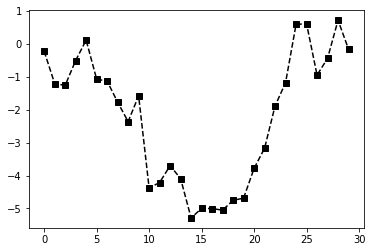

In [ ]:
plt.plot(randn(30).cumsum(), 'ks--')

D'une manière plus explicite:

In [ ]:
from matplotlib.pyplot import plot

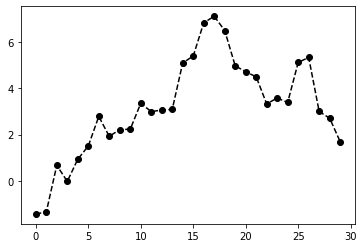

In [ ]:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

Pour les tracés de lignes, on peut remarquer que certains points sont interpolés par défaut. Ceci peut être modifié avec l'option **drawstyle**.

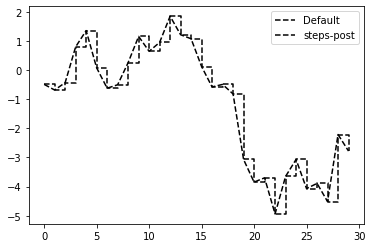

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # loc permet de choisir la mise à disposition de la légende, best pour laisser matplotlib choisir la meilleur localication/location

**Graduations, étiquettes, et légendes**

Pour la plupart des types de décoration de tracés, il existe deux manières pour les ajouter:

* En utilisant la méthode procédurale avec pyplot
* En utilisant la méthode orientée objet native de l'API matplotlib

La première a été conçue pour une utilisation interactive et consiste en des méthodes telles que **xlim**, **xticks** et **xticklabels**, elles contrôlent l'amplitude du tracé, la localisation des ticks et les étiquettes des ticks respectivement. Elles peuvent être utilisées de deux manières:

1. Appelées sans arguments pour retourner la valeur actuelle du paramètre (exemple: plt.xlim())
2. Appelées avec des paramètres pour appliquer les valeurs des paramètres (exemple: plt.xlim([0, 10]) pour changer l'amplitude l'axe X de 0 à 10).

Toutes les méthodes pareilles sont appliquées sur le dernier AxesSubplot crée. Elles correspondent aux deux méthodes de l'objet subplot. Dans le cas de xlim, les deux méthodes sont: ax.get_xlim et ax.set_xlim. 

**Changer le titre, les étiquettes des axes, les graduations et les étiquettes de graduations**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

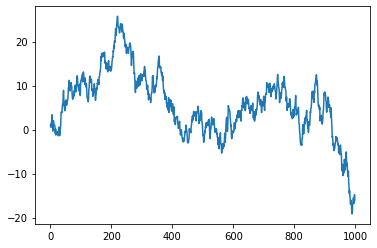

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Pour changer les graduations de l'axe $\vec{X}$, il suffit d'utiliser les fonctions **set_xticks** et **set_xtickslabels**. La première régit où placer les graduations et aussi leurs étiquettes, mais on peut également ces dernières en utilisant **set_tickslabels**:

In [15]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [16]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

Le paramètre **rotation** applique une rotation de 30° aux graduations. La fonction **set_xlabel** applique une étiquette pour l'axe X et **set_title** applique un titre pour le sous-tracé.

In [17]:
ax.set_title('Sous Tracé')

Text(0.5, 1.0, 'Sous Tracé')

In [18]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

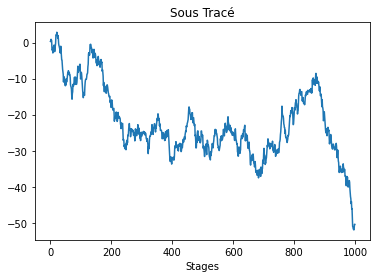

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Sous Tracé')
ax.set_xlabel('Stages')
ax.plot(np.random.randn(1000).cumsum())

Pour modifier l'axe Y, il suffit d'appliquer les mêmes procédures.

On peut aussi utiliser le paramètre props pour changer les caractéristiques du tracé en batch.

In [20]:
props = {
    'title': 'Sous Tracé',
    'xlabel': 'Stages'
}

ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages'), Text(0.5, 1.0, 'Sous Tracé')]

**Ajouter les légendes**

Les légendes sont aussi critiques pour l'identification des éléments du tracé. Il existe plusieurs manières pour ajouter une, la plus simple est de passer l'argument **label**:

In [21]:
from numpy.random import randn

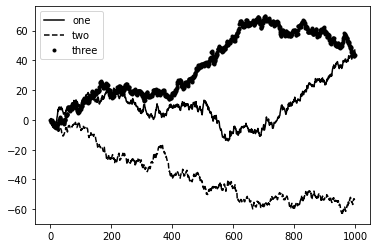

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Le paramètre loc spécifie où placer le tracé. Afin d'exclure un ou plusieurs éléments, il suffit de ne passer aucun label ou label='_nolegend_'.

**Annotations et dessin sur le tracé**

En plus des différents tracés, on peut ajouter nos propres annotations comme le texte, les flèches ou d'autres formes. On peut les ajouter en utilisant les fonctions **text**, **arrow** et **annotate**.

In [24]:
ax.text(10, 10, 'Hello world!', family='monospace', fontsize=10)

Text(10, 10, 'Hello world!')

In [25]:
!wget https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv

--2020-11-15 22:45:52--  https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150105 (147K) [text/plain]
Saving to: ‘spx.csv’

spx.csv             100%[===================>] 146.59K  --.-KB/s    in 0.03s   

2020-11-15 22:45:52 (5.21 MB/s) - ‘spx.csv’ saved [150105/150105]



In [27]:
from datetime import datetime

import pandas as pd

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

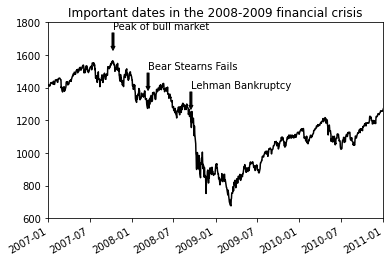

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
               (datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 75),
              xytext=(date, spx.asof(date) + 255),
              arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
              horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Le dessin peut être ajouté en utilisant les formes dénotées **patches**. Quelques formes comme Rectangle et Circle sont dans le package matplotlib.pyplot mais l'ensemble des formes sont situés dans le package matplotlib.patches.

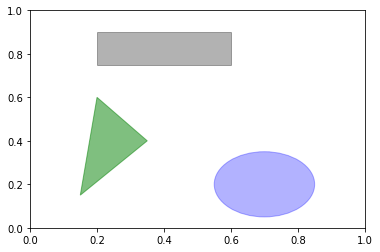

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

**Sauvegarder les tracés**

On peut sauvegarder une figure en utilisant la méthode plt.savefig. Cette méthode est équivalente à la méthode savefig de la figure. Par exemple, pour sauvegarder une version SVG:

In [36]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

Le type du fichier est déduit de l'extension du fichier mentionné. Les options qui permettent de personnaliser la figure. dpi ou dots-per-inch permet de contrôler le nombre de points par pouce et bbox_inches qui permet d'enlever l'espace vide entourant la figure.

In [37]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>


> Argument | Description
> -- | --
> fname | Chemin et nom du fichier
> dpi | La résolution de la figure en points par pouce, la valeur par défaut est 100.
> facecolor | La couleur de l'arrière plan de la figure.
> format | Le format explicite: png, pdf, svg, ps, eps...
> bbox_inches | La partie de la figure à sauvegarder, si 'tight' est passée, l'espace vide est enlevé de la figure.


**Configuration matplotlib**

maplotlib est par défaut configuré avec les valeurs optimales. Ces valeurs peuvent être modifiées en utilisant la méthode **rc**.
Par exemple, pour changer la taille globale de la figure à 10x10:


In [38]:
plt.rc('figure', figsize=(10, 10))

Le premier argument étant le composant qu'on veut personnaliser, comme: 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' suivi d'une séquence des paramètres et valeurs:

In [40]:
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size': 12}
plt.rc('font', **font_options)